In [58]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score, roc_auc_score
from sklearn.linear_model import LogisticRegression

In [39]:
df=pd.read_fwf("C:\\Users\\admin\\Downloads\\MiniBooNE_PID.txt")

In [40]:
df.head()

,36499 93565,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
0,2.59413,0.468803,20.6916,0.322648,0.009682,0.374393,0.803479,0.896592,3.59665,0.249282,...,101.174,-31.3730,0.442259,5.86453,0.000000,0.090519,0.176909,0.457585,0.071769,0.245996
1,3.86388,0.645781,18.1375,0.233529,0.030733,0.361239,1.069740,0.878714,3.59243,0.200793,...,186.516,45.9597,-0.478507,6.11126,0.001182,0.091800,-0.465572,0.935523,0.333613,0.230621
2,3.38584,1.197140,36.0807,0.200866,0.017341,0.260841,1.108950,0.884405,3.43159,0.177167,...,129.931,-11.5608,-0.297008,8.27204,0.003854,0.141721,-0.210559,1.013450,0.255512,0.180901
3,4.28524,0.510155,674.2010,0.281923,0.009174,0.000000,0.998822,0.823390,3.16382,0.171678,...,163.978,-18.4586,0.453886,2.48112,0.000000,0.180938,0.407968,4.341270,0.473081,0.258990
4,5.93662,0.832993,59.8796,0.232853,0.025066,0.233556,1.370040,0.787424,3.66546,0.174862,...,229.555,42.9600,-0.975752,2.66109,0.000000,0.170836,-0.814403,4.679490,1.924990,0.253893


In [41]:
a=[]
for i in range(1,51):
    a.append("pid"+str(i))
print (a)

['pid1', 'pid2', 'pid3', 'pid4', 'pid5', 'pid6', 'pid7', 'pid8', 'pid9', 'pid10', 'pid11', 'pid12', 'pid13', 'pid14', 'pid15', 'pid16', 'pid17', 'pid18', 'pid19', 'pid20', 'pid21', 'pid22', 'pid23', 'pid24', 'pid25', 'pid26', 'pid27', 'pid28', 'pid29', 'pid30', 'pid31', 'pid32', 'pid33', 'pid34', 'pid35', 'pid36', 'pid37', 'pid38', 'pid39', 'pid40', 'pid41', 'pid42', 'pid43', 'pid44', 'pid45', 'pid46', 'pid47', 'pid48', 'pid49', 'pid50']


In [42]:
df.columns=a

In [43]:
df.head()

,pid1,pid2,pid3,pid4,pid5,pid6,pid7,pid8,pid9,pid10,...,pid41,pid42,pid43,pid44,pid45,pid46,pid47,pid48,pid49,pid50
0,2.59413,0.468803,20.6916,0.322648,0.009682,0.374393,0.803479,0.896592,3.59665,0.249282,...,101.174,-31.3730,0.442259,5.86453,0.000000,0.090519,0.176909,0.457585,0.071769,0.245996
1,3.86388,0.645781,18.1375,0.233529,0.030733,0.361239,1.069740,0.878714,3.59243,0.200793,...,186.516,45.9597,-0.478507,6.11126,0.001182,0.091800,-0.465572,0.935523,0.333613,0.230621
2,3.38584,1.197140,36.0807,0.200866,0.017341,0.260841,1.108950,0.884405,3.43159,0.177167,...,129.931,-11.5608,-0.297008,8.27204,0.003854,0.141721,-0.210559,1.013450,0.255512,0.180901
3,4.28524,0.510155,674.2010,0.281923,0.009174,0.000000,0.998822,0.823390,3.16382,0.171678,...,163.978,-18.4586,0.453886,2.48112,0.000000,0.180938,0.407968,4.341270,0.473081,0.258990
4,5.93662,0.832993,59.8796,0.232853,0.025066,0.233556,1.370040,0.787424,3.66546,0.174862,...,229.555,42.9600,-0.975752,2.66109,0.000000,0.170836,-0.814403,4.679490,1.924990,0.253893


In [44]:
print ("Number of NULL values = ",df.isnull().sum())

Number of NULL values =  pid1     0
pid2     0
pid3     0
pid4     0
pid5     0
pid6     0
pid7     0
pid8     0
pid9     0
pid10    0
pid11    0
pid12    0
pid13    0
pid14    0
pid15    0
pid16    0
pid17    0
pid18    0
pid19    0
pid20    0
pid21    0
pid22    0
pid23    0
pid24    0
pid25    0
pid26    0
pid27    0
pid28    0
pid29    0
pid30    0
pid31    0
pid32    0
pid33    0
pid34    0
pid35    0
pid36    0
pid37    0
pid38    0
pid39    0
pid40    0
pid41    0
pid42    0
pid43    0
pid44    0
pid45    0
pid46    0
pid47    0
pid48    0
pid49    0
pid50    0
dtype: int64


In [45]:
df['target']=0

In [46]:
signal=36499
background=93565

In [47]:
df.iloc[:36499, len(df.columns)-1] = 1

In [48]:
df.head()

,pid1,pid2,pid3,pid4,pid5,pid6,pid7,pid8,pid9,pid10,...,pid42,pid43,pid44,pid45,pid46,pid47,pid48,pid49,pid50,target
0,2.59413,0.468803,20.6916,0.322648,0.009682,0.374393,0.803479,0.896592,3.59665,0.249282,...,-31.3730,0.442259,5.86453,0.000000,0.090519,0.176909,0.457585,0.071769,0.245996,1
1,3.86388,0.645781,18.1375,0.233529,0.030733,0.361239,1.069740,0.878714,3.59243,0.200793,...,45.9597,-0.478507,6.11126,0.001182,0.091800,-0.465572,0.935523,0.333613,0.230621,1
2,3.38584,1.197140,36.0807,0.200866,0.017341,0.260841,1.108950,0.884405,3.43159,0.177167,...,-11.5608,-0.297008,8.27204,0.003854,0.141721,-0.210559,1.013450,0.255512,0.180901,1
3,4.28524,0.510155,674.2010,0.281923,0.009174,0.000000,0.998822,0.823390,3.16382,0.171678,...,-18.4586,0.453886,2.48112,0.000000,0.180938,0.407968,4.341270,0.473081,0.258990,1
4,5.93662,0.832993,59.8796,0.232853,0.025066,0.233556,1.370040,0.787424,3.66546,0.174862,...,42.9600,-0.975752,2.66109,0.000000,0.170836,-0.814403,4.679490,1.924990,0.253893,1


In [49]:
x=df.loc[:,'pid1':'pid50']
y=df.loc[:,'target':'target']

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=0)
XY_train = pd.concat([X_train, Y_train], axis=1)
print("X_train.shape: {} Y_train.shape: {}".format(X_train.shape, Y_train.shape))
print("X_test.shape: {} Y_test.shape: {}".format(X_test.shape, Y_test.shape))

X_train.shape: (91044, 50) Y_train.shape: (91044, 1)
X_test.shape: (39020, 50) Y_test.shape: (39020, 1)


In [51]:
XY_train.describe()

,pid1,pid2,pid3,pid4,pid5,pid6,pid7,pid8,pid9,pid10,...,pid42,pid43,pid44,pid45,pid46,pid47,pid48,pid49,pid50,target
count,91044.000000,91044.000000,91044.000000,91044.000000,91044.000000,91044.000000,91044.000000,91044.000000,91044.000000,91044.000000,...,91044.000000,91044.000000,91044.000000,91044.000000,91044.000000,91044.000000,91044.000000,91044.000000,91044.000000,91044.000000
mean,1.245739,5.085244,130.913434,3.881187,-3.589784,3.759345,4.567109,4.420151,7.038109,3.772413,...,-25.231190,-2.869075,9.579347,3.608077,3.776794,-3.757409,6.443986,-1.992183,3.829017,0.281424
std,60.156880,59.771110,190.750256,59.837372,59.854866,59.844795,59.797079,59.804976,59.648076,59.843899,...,67.607233,59.910799,59.669620,59.853772,59.843673,59.852857,59.713708,59.983076,59.840503,0.449696
min,-999.000000,0.070748,0.012381,0.108747,-999.000000,0.000000,0.000000,0.033510,2.397440,0.043223,...,-999.000000,-999.000000,0.249186,0.000000,0.000000,-999.000000,0.000417,-999.000000,0.000000,0.000000
25%,4.007245,0.883140,50.135025,0.241972,0.000000,0.086603,0.719711,0.784531,3.287120,0.143350,...,-40.105750,-0.028908,3.432203,0.000000,0.122472,-0.340275,1.432818,0.274357,0.197854,0.000000
50%,4.784855,1.387700,106.544000,0.272528,0.004983,0.141850,0.926764,0.834723,3.428510,0.171021,...,-21.531750,0.457309,4.772510,0.000000,0.168932,0.042489,2.378255,1.123340,0.231887,0.000000
75%,5.625775,1.957515,139.386000,0.315982,0.013086,0.215270,1.186565,0.874856,3.588060,0.200703,...,-3.345440,1.145713,6.875313,0.002028,0.225261,0.295969,3.800000,2.280712,0.263849,1.000000
max,17.057300,999.000000,4747.670000,999.000000,0.174658,999.000000,999.000000,999.000000,999.000000,999.000000,...,161.298000,43.651200,999.000000,999.000000,999.000000,1.789600,999.000000,24.272800,999.000000,1.000000


In [52]:
XY_train.groupby('target').size()

target
0    65422
1    25622
dtype: int64

# Exploratory Data Analysis

### Histogram

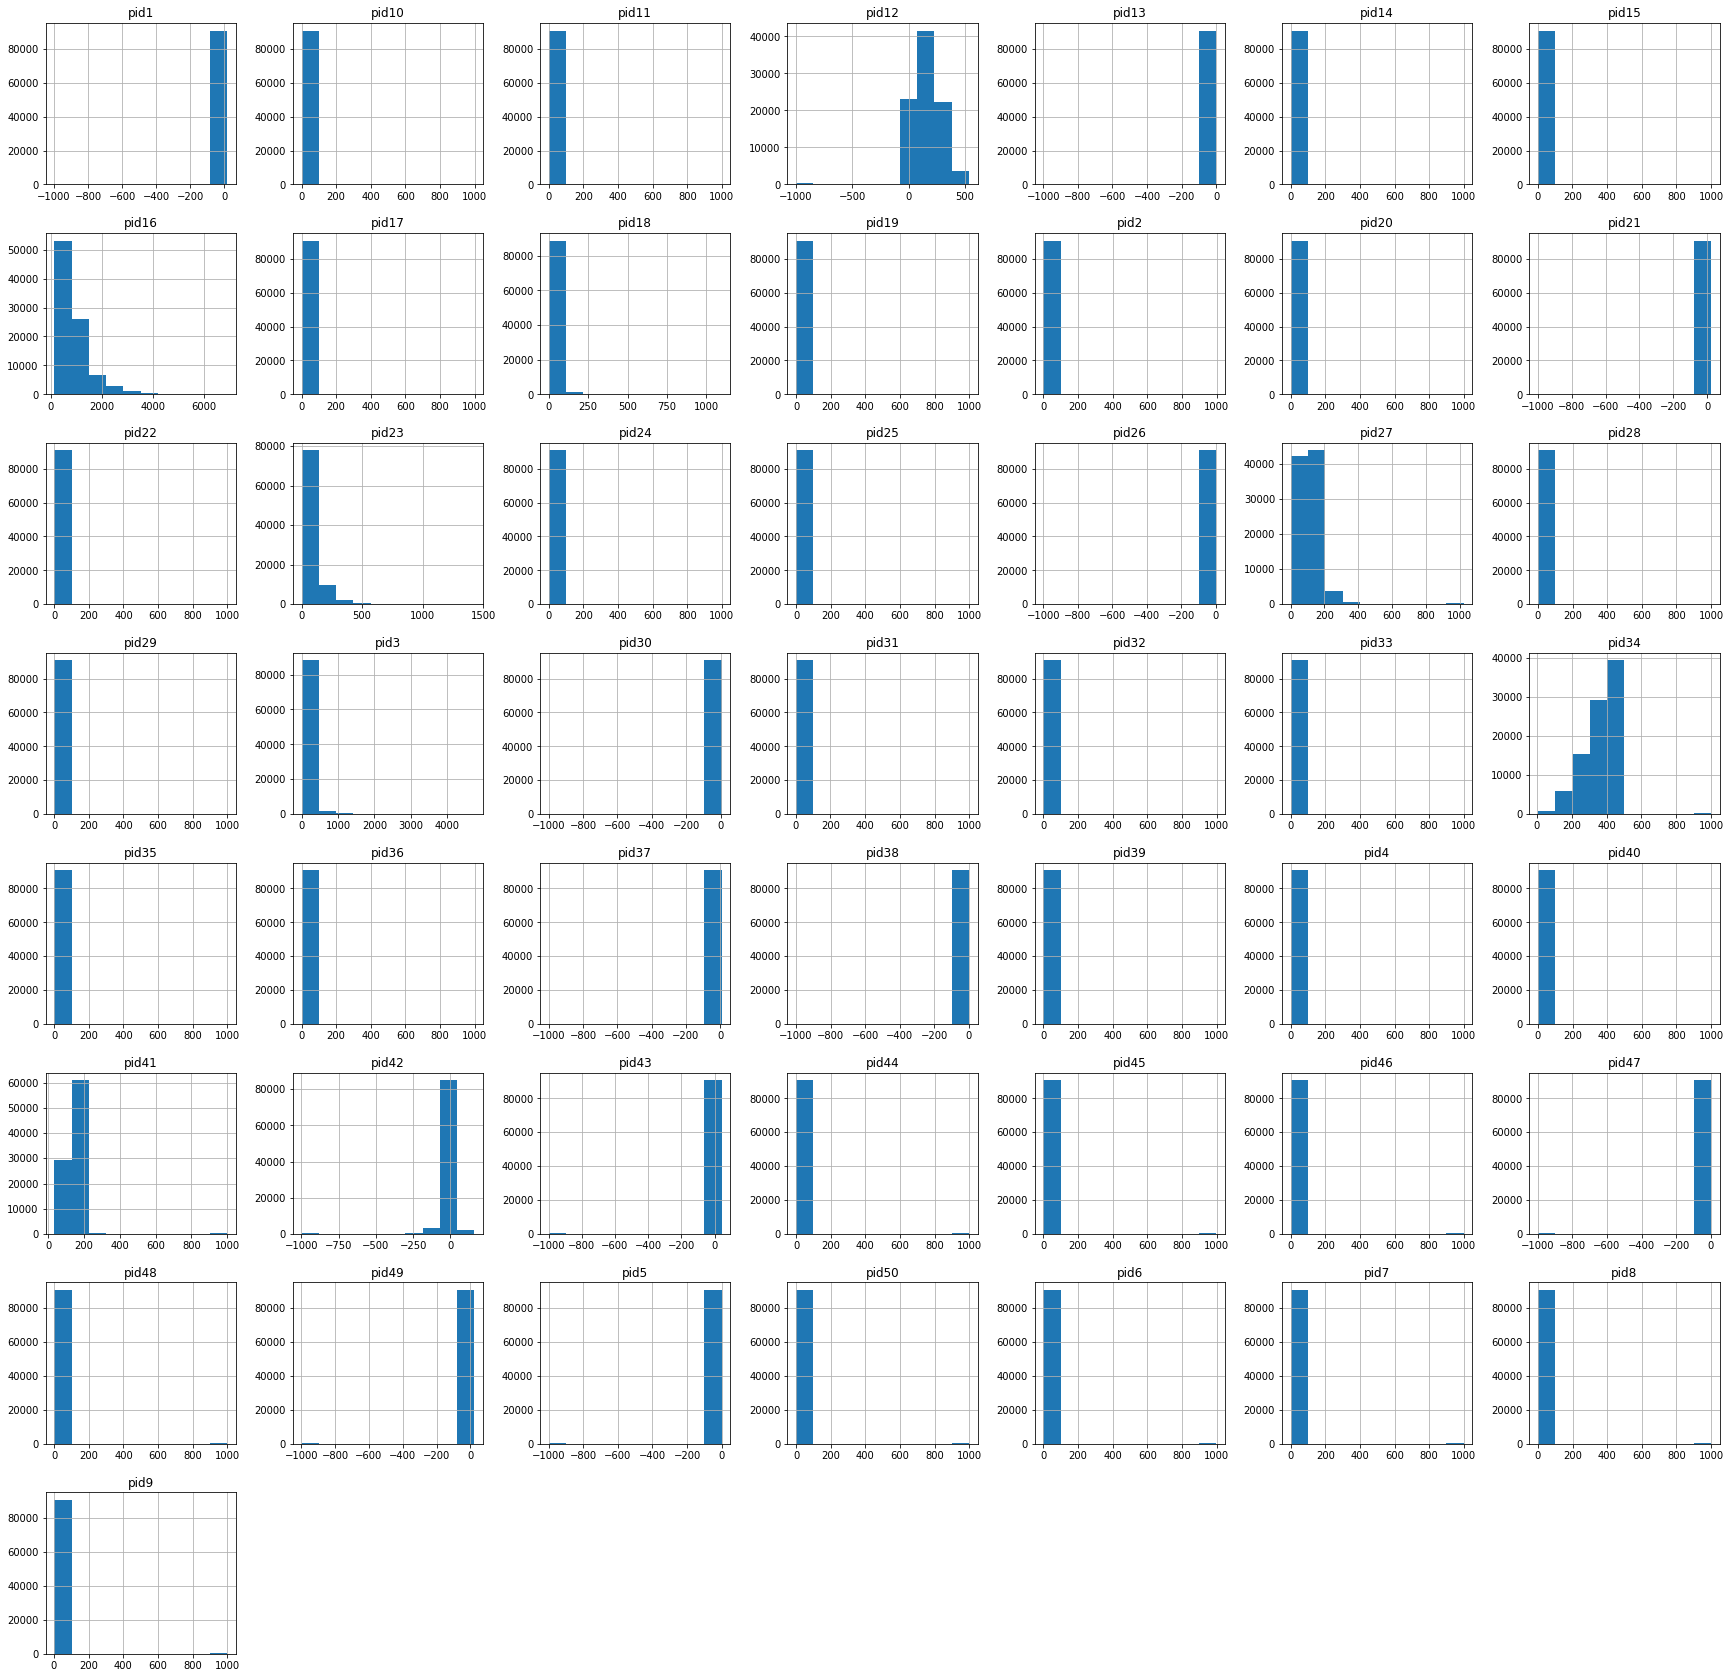

In [31]:
X_train.hist(figsize=(30,30))
plt.show()

### Density Plots

In [ ]:
X_train.plot(kind='density', subplots=True,figsize=(100,100),sharex=False, sharey=False)
plt.show()

### Box and Whiskers Plot

In [ ]:
X_train.plot(kind='box', subplots=True, figsize=(100,100), sharex=False, sharey=False)
pyplot.show()

In [ ]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(X

In [ ]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(X_train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [37]:
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score
base_learners = [5]
depth = [5]

def best_alpha(vec,vec_t):
   
    param_grid = {'n_estimators': base_learners,'max_depth': depth}
    RFC = XGBClassifier(max_features='sqrt')
    model = GridSearchCV(RFC, param_grid, scoring = 'roc_auc', cv=3 , n_jobs = -1,pre_dispatch=2)
    model.fit(vec, Y_train)
    print("Model with best parameters :\n",model.best_estimator_)
    print("Accuracy of the model : ",model.score(vec_t, Y_test))
    # Optimal value of number of base learners
    optimal_learners = model.best_estimator_.n_estimators
    print("The optimal number of base learners is : ",optimal_learners)
    optimal_depth=model.best_estimator_.max_depth
    print("The optimal number of depth is : ",optimal_depth)
    return model
def conf_mat(model):
    print("Best HyperParameter: ",model.best_params_)
    print(model.best_score_)
    scores = model.cv_results_['mean_test_score'].reshape(len(base_learners),len(depth))
    plt.figure(figsize=(16, 12))
    sns.heatmap(scores, annot=True, fmt=".3f", xticklabels=base_learners, yticklabels=depth)
    plt.xlabel('n_estimators')
    plt.ylabel('max_depth')
    plt.xticks(np.arange(len(base_learners)), base_learners)
    plt.yticks(np.arange(len(depth)), depth)
    plt.title('Grid Search AUC_ROC_Score')
    plt.show()
    
def test(vec,vec_t,model):
    clf=XGBClassifier(n_estimators=model.best_estimator_.n_estimators, max_depth=model.best_estimator_.max_depth)
    clf.fit(vec,y_train)
    a=confusion_matrix(y_test, clf.predict(vec_t))
    print(a)
    d=pd.DataFrame(a,index=['Positive','Negative'],columns=['Positive','Negative'])
    plt.figure(figsize = (10,7))
    sn.heatmap(d, annot=True,fmt='g')
    plt.title('Test Confusion Matrix')
    plt.show()


ModuleNotFoundError: No module named 'xgboost'

In [ ]:
best_alpha(X_train,X_test)

In [61]:
c=[0.001,0.01,0.1,1,10]
l=['l1','l2']
def best_alpha(vec,vec_t):
   
    param_grid = {'C':c, 'penalty':l }
    lr=LogisticRegression()
    model = GridSearchCV(lr, param_grid, scoring = 'roc_auc', cv=3 , n_jobs = -1)
    model.fit(vec, Y_train)
    print("Model with best parameters :\n",model.best_estimator_)
    print("Accuracy of the model : ",model.score(vec_t, Y_test))
    # Optimal value of number of neighbours
    print("The optimal number of C is : ",model.best_estimator_.C)
    print("The penalty is : ",model.best_estimator_.penalty)
    return model
def conf_mat(model):
    print("Best HyperParameter: ",model.best_params_)
    print(model.best_score_)
    scores = model.cv_results_['mean_test_score'].reshape(len(c),len(l))
    plt.figure(figsize=(16, 12))
    sns.heatmap(scores, annot=True, fmt=".3f", xticklabels=c, yticklabels=l)
    plt.xlabel('C')
    plt.ylabel('penalty')
    plt.xticks(np.arange(len(c)), c)
    plt.yticks(np.arange(len(l)), l)
    plt.title('Grid Search AUC_ROC_Score')
    plt.show()
    
def test(vec,vec_t,model):
    lr=LogisticRegression(C=model.best_estimator_.C, penalty=model.best_estimator_.penalty)
    clf.fit(X_train,Y_train)
    a=confusion_matrix(Y_test, clf.predict(X_test))
    print(a)
    d=pd.DataFrame(a,index=['Positive','Negative'],columns=['Positive','Negative'])
    plt.figure(figsize = (10,7))
    sns.heatmap(d, annot=True,fmt='g')
    plt.title('Test Confusion Matrix')
    plt.show()


In [62]:
model=best_alpha(X_train,X_test)

Model with best parameters :
 LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy of the model :  0.9623677651794562
The optimal number of C is :  10
The penalty is :  l2


Best HyperParameter:  {'C': 10, 'penalty': 'l2'}
0.9599499651286232


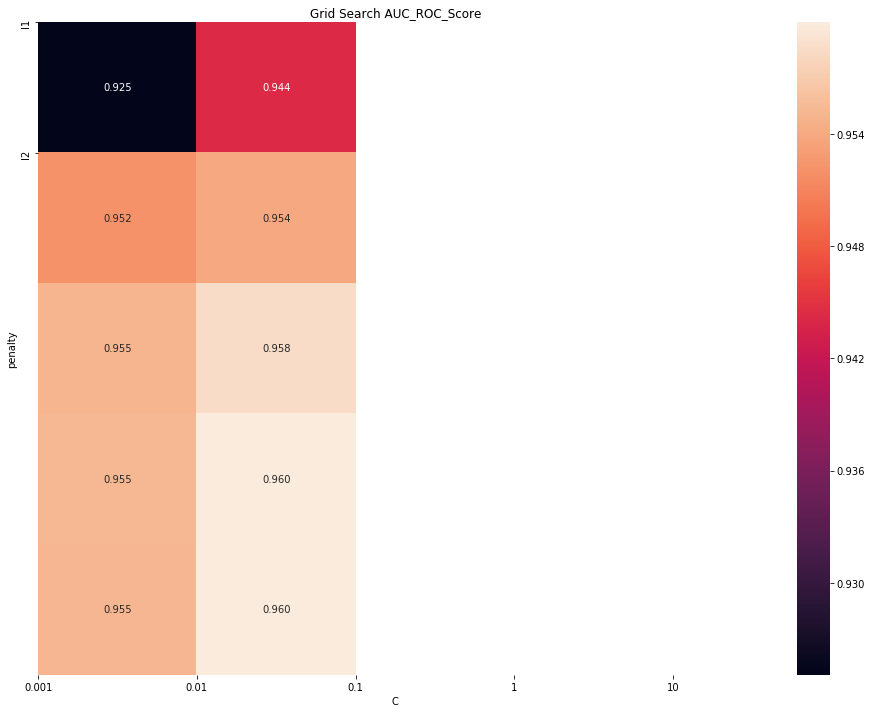

In [63]:
conf_mat(model)

In [64]:
test(X_train,X_test,model)

NameError: name 'clf' is not defined